In [1]:
# Recurrent Neural Network

In [2]:
# Part 1 - Data Preprocessing

In [3]:
# Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Importing the training set

dataset = pd.read_csv('full_all_factor789.csv')

electric_data = pd.DataFrame(dataset.vrf_power)

training_set = pd.DataFrame(dataset.temperature)
training_set['humidity'] = dataset.humidity
training_set['wind_speed'] = dataset.wind_speed

In [6]:
X_train = np.array(training_set)
y_train = np.array(electric_data)
                   
print(np.shape(X_train))
print(np.shape(y_train))

X_train = X_train[:-1000, :]
y_train = y_train[:-1000, :]

print(np.shape(X_train))
print(np.shape(y_train))

X_test = np.array(training_set)[-1000:, :]
y_test = np.array(electric_data)[-1000:, :]

print(np.shape(X_test))
print(np.shape(y_test))

(42307, 3)
(42307, 1)
(41307, 3)
(41307, 1)
(1000, 3)
(1000, 1)


In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

In [9]:
# Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# Initializing the RNN

In [12]:
regressor = Sequential()

In [13]:
# Adding the first LSTM layer and some Dropout regularization

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
# Adding a second LSTM layer and some Dropout regularization

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a third LSTM layer and some Dropout regularization

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
# Adding a fourth LSTM layer and some Dropout regularization

In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [21]:
# Adding the output layer

In [22]:
regressor.add(Dense(units = 1))

In [23]:
# Compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
# Fitting the RNN to the Training set

In [26]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 512)

Epoch 1/100
41307/41307 [==============================] - 6s 151us/step - loss: 648.5715
Epoch 2/100
41307/41307 [==============================] - 3s 78us/step - loss: 567.7068
Epoch 3/100
41307/41307 [==============================] - 3s 77us/step - loss: 526.9013
Epoch 4/100
41307/41307 [==============================] - 3s 82us/step - loss: 477.7003
Epoch 5/100
41307/41307 [==============================] - 4s 91us/step - loss: 455.8343
Epoch 6/100
41307/41307 [==============================] - 3s 78us/step - loss: 442.0342
Epoch 7/100
41307/41307 [==============================] - 3s 81us/step - loss: 432.0833
Epoch 8/100
41307/41307 [==============================] - 3s 78us/step - loss: 424.0302
Epoch 9/100
41307/41307 [==============================] - 3s 79us/step - loss: 415.7229
Epoch 10/100
41307/41307 [==============================] - 3s 78us/step - loss: 409.6137
Epoch 11/100
41307/41307 [==============================] - 3s 83us/step - loss: 405.5665
Epoch 12/100
41307

41307/41307 [==============================] - 3s 78us/step - loss: 360.3702
Epoch 93/100
41307/41307 [==============================] - 3s 81us/step - loss: 363.4708
Epoch 94/100
41307/41307 [==============================] - 3s 78us/step - loss: 361.3814
Epoch 95/100
41307/41307 [==============================] - 3s 78us/step - loss: 359.7512
Epoch 96/100
41307/41307 [==============================] - 3s 79us/step - loss: 359.8679
Epoch 97/100
41307/41307 [==============================] - 3s 80us/step - loss: 358.9194
Epoch 98/100
41307/41307 [==============================] - 3s 80us/step - loss: 362.5053
Epoch 99/100
41307/41307 [==============================] - 3s 80us/step - loss: 360.4979
Epoch 100/100
41307/41307 [==============================] - 3s 81us/step - loss: 358.3832


In [27]:
# Part 3 - Making the predictions and visualizing the results

In [28]:
# Getting the predicted total

In [31]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)

Text(0,0.5,'vrf_power')

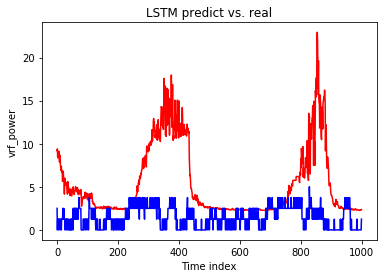

In [34]:
plt.plot(predict, color = 'red', label = 'Predict')
plt.plot(y_test, color = 'blue', label = 'Real')
plt.title('LSTM predict vs. real')
plt.xlabel('Time index')
plt.ylabel('vrf_power')